# Neural Networks II

## Introduction

- We continue our work on neural networks.
- This lecture focuses on some key components and challenges.

## Activation functions

- McCulloch - Pitts neuron and the Perceptron was motivated by neurons in the brain.
- Utilised a step function to mimic a neuron "firing".
- Not good for gradient descent $\Rightarrow$ replace with a differentiable approximation of the step function.
- The "classic" activation function is the sigmoid activation function: $$f_{\text{s}}(x) = \dfrac{1}{1+\exp(-x)}$$
- Nice derivative: $$\frac{d f_{\text{s}}(x)}{dx}=f_{\text{s}}(x)(1-f_{\text{s}}(x))$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 400)

# Step activation function
step = np.where(x >= 0, 1, 0)

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-x))


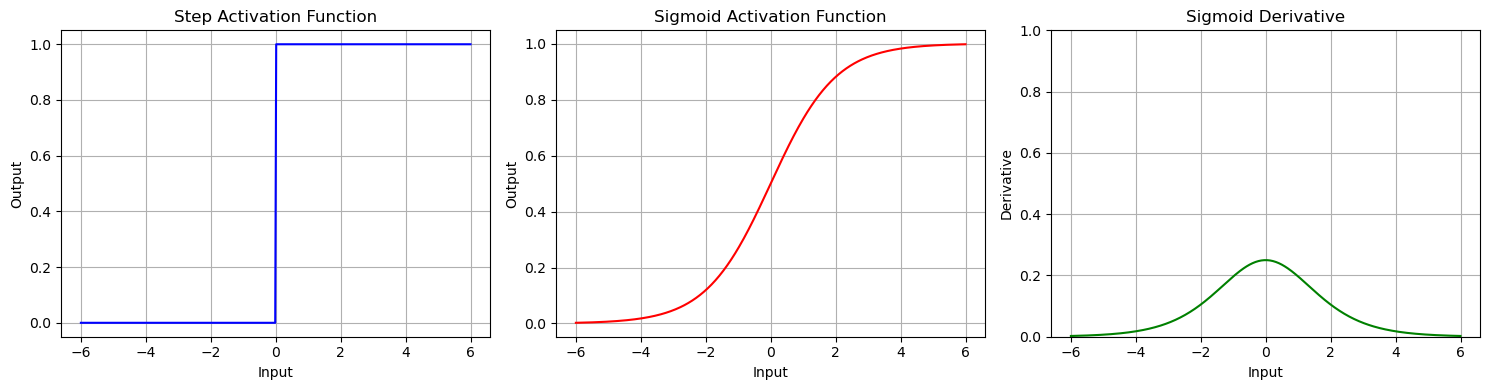

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(x, step, color='blue')
plt.title('Step Activation Function')
plt.subplot(1, 3, 2)
plt.plot(x, sigmoid, color='red')
plt.title('Sigmoid Activation Function')
plt.subplot(1, 3, 3)
sigmoid_derivative = sigmoid * (1 - sigmoid)
plt.plot(x, sigmoid_derivative, color='green')
plt.title('Sigmoid Derivative')
plt.tight_layout()
plt.show()

### Backpropagation for MLP with one neuron in each layer

- Consider MLP with 4 layers and 1 neuron in each layer.
- Let us do Backpropagation with this network.

<p float="left">
    <img src="media/simple_nn.png" width="800" />
</p>


### The vanishing gradient problem

- As the number of layers increase, the number of $1>$ numbers get multiplied.
- Gradients "vanish", training lower layers becomes difficult.

<p float="left">
    <img src="media/simple_nn.png" width="800" />
</p>


### What about other activation functions?

- Another classical choice: $$f_{\text{t}}(x) = \text{tanh}(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
- Also nice derivative: $$\frac{d f_{\text{t}}(x) }{dx}=1-f_{\text{t}}(x)^2$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 400)

# Sigmoid activation function and its derivative
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

# Tanh activation function and its derivative
tanh = np.tanh(x)
tanh_derivative = 1 - tanh**2

Text(0, 0.5, 'Output / Derivative')

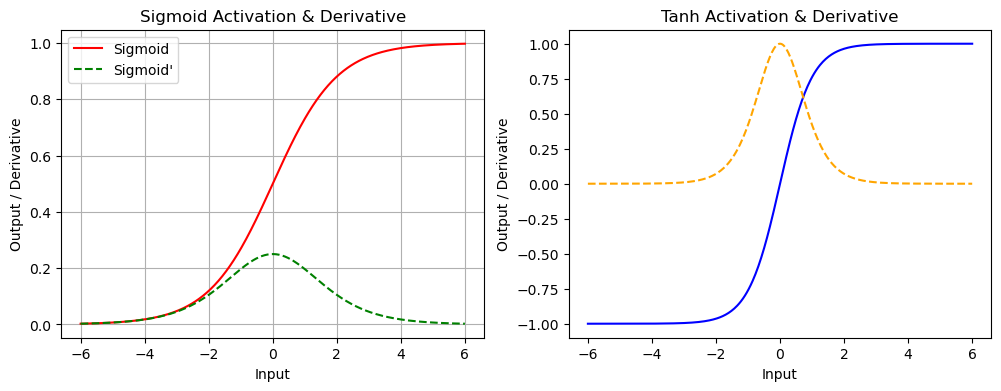

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid, label='Sigmoid', color='red')
plt.plot(x, sigmoid_derivative, label="Sigmoid'", color='green', linestyle='--')
plt.title('Sigmoid Activation & Derivative')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, tanh, label='Tanh', color='blue')
plt.plot(x, tanh_derivative, label="Tanh'", color='orange', linestyle='--')
plt.title('Tanh Activation & Derivative')
plt.show()

### What about other activation functions?

- Tanh has slightly better behavior than sigmoid, but still issues.
- Modern acitvation functions handle this problem much better (covered in FYS3033).

## Gradient descent with momentum

### Momentum

- Standard gradient descent can have slow convergence
    - Slow to train! Draw example $\Rightarrow$

### Momentum

- Idea: incorporate information from previous iteration. Keep the "momentum".
- Reminder: $$ \mathbf{w}_j^l (t+1) = \mathbf{w}_j^l (t) - \gamma \frac{\partial}{\partial  \mathbf{w}_j^l} J$$
- Now, with momentum: $$ \Delta \mathbf{w}_j^l = \alpha \mathbf{w}_j^l (t) - \gamma \frac{\partial}{\partial  \mathbf{w}_j^l} J$$


### Momentum for T succesive iteration steps

- Momentum effectively increases the learning constant.
- Let $$ \frac{\partial}{\partial  \mathbf{w}_j^l} J = \mathbf{g}(t)$$
- $$ \Delta \mathbf{w}_j^l (T) = -\gamma \sum_{t=0}^{T-1} \alpha^t \mathbf{g}(T-t)+\alpha^T \Delta \mathbf{w}_j^l (0) $$
- Now, assume we are in a low curvature point of the loss function $\Rightarrow$ gradient approximately constant!
- $$ \Delta \mathbf{w}_j^l (T) \approx -\gamma(1+\alpha+\alpha^2+ \cdots \alpha^{T-1})\mathbf{g}

## Beyond binary classification

- So far, we have focused on binary classification (2 classes).
- Fits well with sigmoid.
- However, we often have more than 2 classes. In these cases, the sigmoid is less suitable.

### The softmax function

- The standard choice for multiclass classification is to use a softmax function in the output layer.
- $$ \hat{y}_k = \frac{\exp(v_k^L)}{\sum_{k'} \exp(v_{k'}^L)} $$
- Guarantees that the output lies in the interval $[0, 1]$ and sums to 1.
- Note: **one-hot encoding**

### Derivative of the softmax function

- Need to know derivative of softmax function for Backpropagation and gradient descent.
- Need to compute $$\frac{\partial}{\partial v^L_m} \hat{y}_k =  \frac{\partial}{\partial v^L_m} \frac{\exp(v_k^L)}{\sum_{k'} \exp(v_{k'}^L)}.$$
- Key is to realize that we have two cases: $m=k$ and $m\neq k$
- For $m=k$: $$ \frac{\exp(v_k^L) \sum_{k'} \exp(v_{k'}^L)-\exp(v_k^L)\exp(v_m^L)}{(\sum_{k'} \exp(v_{k'}^L))^2} $$
- For $m\neq k$: $$ \frac{-\exp(v_k^L)\exp(v_m^L)}{(\sum_{k'} \exp(v_{k'}^L))^2} $$


### Cross-entropy loss

- Can use a squared error like we have done in the past.
- However, using the cross-entropy loss function is much more common: $$J_{ce} -\sum_{k=1}^{k_L} y_k(i) \log (\hat{y}_k)$$
- Fits nicely with softmax, derivative of cross-entropy loss assuming softmax loss function and one-hot encoded labels.
- Take derivative with respect to preactivation $v^L_m$. Key idea again, split sum into $m=k$ and $m\neq k$:
- $$ \frac{\partial}{\partial v^L_m} J_{ce} = -\frac{\partial}{\partial v^L_m} y_k(i) \log (\hat{y}_k) -\frac{\partial}{\partial v^L_m} \sum_{k'\neq m}^{k_L}y_{k'}(i) \log (\hat{y}_{k'})$$

### Cross-entropy loss

- Other benefits associated with the cross-entropy loss.
- [See this book for a very nice and detailed explanation.](http://neuralnetworksanddeeplearning.com/chap3.html)
- Can also be used for binary classification.

### Weight initialization

- Need a starting point for our parameters.
- Many heuristics. Different choices for differnt acitvation functions. Will focus on sigmoid and tanh.
- Key paper: Glorot and Bengio, Understanding the difficulty of training deep feedforward neural networks, 2010.
- Avoid symmetry!
- Xavier initialization: $$ w_{jm}^l \sim \mathcal{U}\left(-\sqrt{\frac{6}{k_{l+1}+k_{l-1}}}, \sqrt{\frac{6}{k_{l+1}+k_{l-1}}}\right)$$

## Non-linear classification I

The code below loads a classic synthetic machine learning dataset, the Two Moons dataset. This is a binary classification problem that is not solvable with a linear classifier (try one of your classifiers from previous notebooks and see for yourself.) Design and train a MLP to solve the task. You can experiment with making the problem more or less challenging by changing the "noise" parameter in the "make_moons" function.

This is the same problem as last week, but this time you will optimize with momentum included in the gradient descent algorithm.

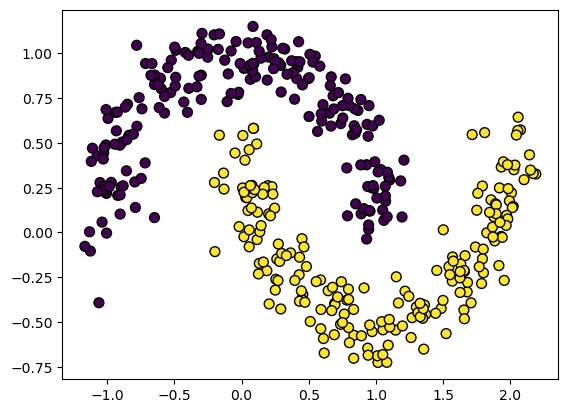

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=400, noise=0.11, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()